# ツイートの平均ベクトル可視化

In [7]:
from pathlib import Path
import pickle

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict

In [10]:
leaders = OrderedDict()
for name in Path("politicians").glob("*.pickle"):
    with name.open("rb") as f:
        leaders[name.stem] = pickle.load(f)
for data, key in zip(leaders.values(), leaders.keys()):
    n_data = []
    print(key)
    for t in data:
        n_data.append(t[2])
    leaders[key] = n_data

AbeShinzo
edanoyukio0531
gogoichiro
shiikazuo
tamakiyuichiro


In [13]:
print(leaders.keys())

odict_keys(['AbeShinzo', 'edanoyukio0531', 'gogoichiro', 'shiikazuo', 'tamakiyuichiro'])


## 2D

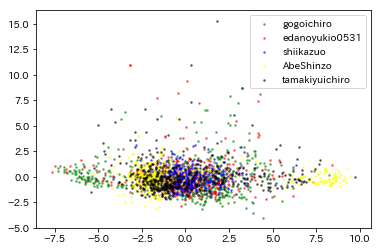

In [12]:
l_pca = dict()
for data, key in zip(leaders.values(), leaders.keys()):
        pca = PCA(n_components=2)
        pca.fit(data)
        l_pca[key] = pca.transform(data)

colors = ["green","red","blue","yellow","black","pink"]
i = 0
for l, k in zip(l_pca.values(),l_pca.keys()):
    x = [v[0] for v in l]
    y = [v[1] for v in l]
    plt.scatter(x,y,color=colors[i],marker=".",alpha=0.5,s=10,label=k)
    i += 1
plt.legend()
plt.show()

## 3D

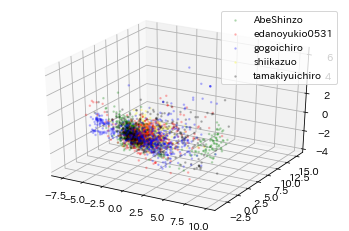

In [16]:
l_pca = OrderedDict()
for data, key in zip(leaders.values(), leaders.keys()):
        pca = PCA(n_components=3)
        pca.fit(data)
        l_pca[key] = pca.transform(data)

colors = ["green","red","blue","yellow","black","white"]
i = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for l, k in zip(l_pca.values(),l_pca.keys()):
    x = [v[0] for v in l]
    y = [v[1] for v in l]
    z = [v[2] for v in l]
    ax.scatter(x,y,z,color=colors[i],marker=".",alpha=0.2,s=10,label=k)
    i += 1
plt.legend()
plt.show()

## GMM

In [5]:
from sklearn import cluster, preprocessing, mixture

X = []
for data, key in zip(leaders.values(), leaders.keys()):
        X.append(data)

print(X)
        
print("fitting...")
gmm=mixture.GaussianMixture(n_components=5,covariance_type='full')
z_gmm=gmm.fit(X)
z_gmm=z_gmm.predict(X)
print("finish")

pca = PCA(n_components=2)
pca.fit(X)
l_pca = pca.transform(X)

plt.scatter(l_pca ,c=z_gmm)
plt.show

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ValueError: Found array with dim 3. Estimator expected <= 2.